In [24]:
import pandas as pd
import os

def load_csvs_from_multiple_folders(folder_paths, file_names):
    """
    从多个指定文件夹加载 CSV 文件并返回对应的 DataFrame。

    参数：
    folder_paths : list
        包含 CSV 文件的文件夹路径列表。
    file_names : list
        包含要加载的 CSV 文件名的列表（不带扩展名）。

    返回：
    dict
        包含 DataFrame 的字典，键为文件名，值为对应的 DataFrame。
    """
    dataframes = {}
    
    for folder_path in folder_paths:
        for file_name in file_names:
            file_path = os.path.join(folder_path, f"{file_name}.csv")
            
            if os.path.exists(file_path):
                dataframes[file_name] = pd.read_csv(file_path)
            else:
                print(f"文件 {file_path} 不存在。")
    
    return dataframes

def merge_dataframes(df_list, names):
    """
    合并多个 DataFrame，并根据名称添加新列。

    参数：
    df_list : list
        包含要合并的 DataFrame 的列表。
    names : list
        包含对应 DataFrame 名称的列表（不带后缀）。

    返回：
    pd.DataFrame
        合并后的 DataFrame。
    """
    combined_dfs = []
    
    for df, name in zip(df_list, names):
        clean_name = name.replace('_market_analysis', '_cat')  # 去掉后缀
        df[clean_name] = 1  # 假设对应类别的列值为 1
        for other_name in names:
            other_clean_name = other_name.replace('_market_analysis', '_cat')  # 其他名称去掉后缀
            if other_clean_name != clean_name:
                df[other_clean_name] = 0  # 其他类别的列值为 0
        combined_dfs.append(df)

    # 合并所有 DataFrame
    combined_df = pd.concat(combined_dfs, ignore_index=True)
    return combined_df

# 示例用法
folder_paths = ['binance-launchpad', 'binance-launchpool']  # 替换为您的文件夹路径
file_names = ['binance-launchpad_market_analysis', 'binance-launchpool_market_analysis']  # 替换为您的文件名（不带扩展名）

# 调用函数加载 CSV 文件
dataframes = load_csvs_from_multiple_folders(folder_paths, file_names)

# 将 DataFrame 列表和名称传入合并函数
df_list = [dataframes[file_name] for file_name in file_names if file_name in dataframes]
combined_df = merge_dataframes(df_list, file_names)

# 打印合并后的 DataFrame
combined_df

文件 binance-launchpad/binance-launchpool_market_analysis.csv 不存在。
文件 binance-launchpool/binance-launchpad_market_analysis.csv 不存在。


,Token ID,Token Name,Symbol,Listed Date,1st Day Price,2nd Day Price,Price Change 1 Day (%),31st Day Price,Price Change 30 Days (%),1st Day Volume,2nd Day Volume,31st Day Volume,Volume Change 1 Day (%),Volume Change 30 Days (%),binance-launchpad_cat,binance-launchpool_cat
0,fc-barcelona-fan-token,FC Barcelona Fan Token,bar,2020-06-25,6.261206,6.261206,0.000000,4.055995,-35.220235,3.118770e+05,3.118770e+05,1.483723e+05,0.000000,-52.425998,1,0
1,the-sandbox,The Sandbox,sand,2020-08-14,0.080920,0.066403,-17.939351,0.049274,-39.107902,3.841302e+07,1.410560e+08,6.050311e+06,267.208840,-84.249324,1,0
2,wink,WINkLink,win,2019-08-02,0.000460,0.000379,-17.458622,0.000311,-32.326768,5.138387e+07,1.309570e+07,1.804227e+07,-74.513989,-64.887296,1,0
3,harmony,Harmony,one,2019-06-02,0.023419,0.020503,-12.451716,0.019416,-17.095337,6.470791e+08,1.063956e+08,1.676470e+07,-83.557564,-97.409172,1,0
4,perlin,PERL.eco,perl,2019-08-27,0.114880,0.112059,-2.456247,0.036246,-68.448604,6.187399e+07,3.062817e+07,3.645708e+06,-50.499115,-94.107850,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,venus,Venus,xvs,2020-10-06,3.462228,3.462228,0.000000,2.163280,-37.517677,1.080718e+08,1.080718e+08,1.423597e+06,0.000000,-98.682730,0,1
86,manchester-city-fan-token,Manchester City Fan Token,city,2021-05-25,22.966325,22.966325,0.000000,11.282927,-50.871868,2.018127e+07,2.018127e+07,4.669778e+05,0.000000,-97.686083,0,1
87,memecoin-2,Memecoin,meme,2023-11-03,0.026517,0.026517,0.000000,0.031486,18.735406,7.283553e+08,7.283553e+08,2.143457e+08,0.000000,-70.571278,0,1
88,beam-2,Beam,beam,2023-10-26,0.004795,0.004795,0.000000,0.008436,75.925174,4.310535e+06,4.310535e+06,1.284030e+07,0.000000,197.881806,0,1


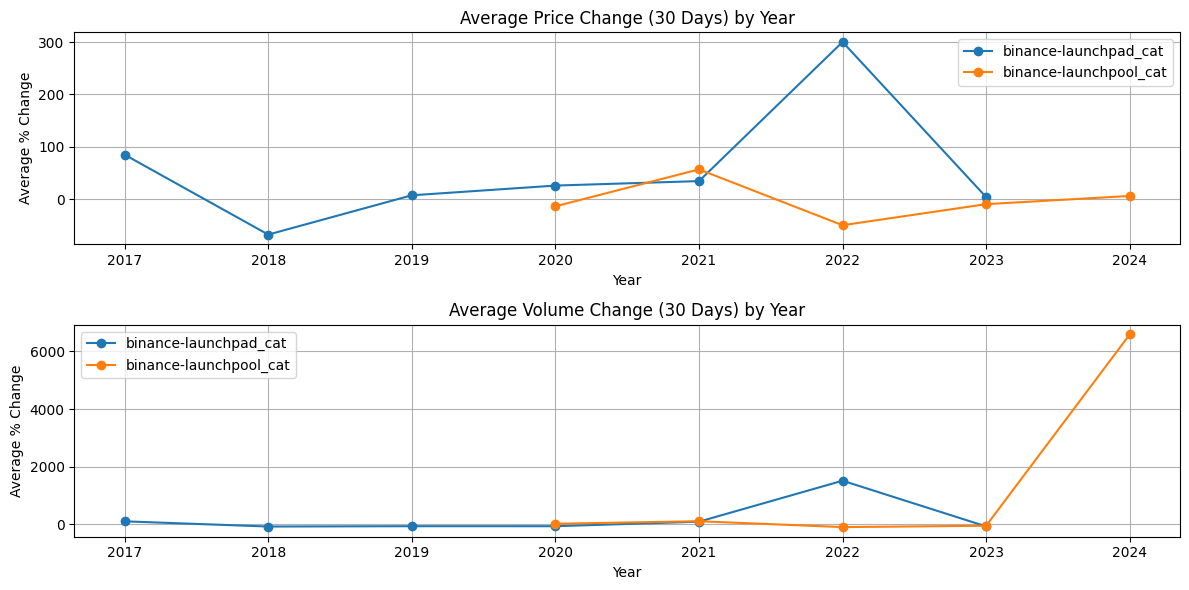

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 combined_df 已经定义并包含所需的列，并且 'Listed Date' 列存在

# 确保 'Listed Date' 列为 datetime 类型
combined_df['Listed Date'] = pd.to_datetime(combined_df['Listed Date'])

# 提取年份
combined_df['Year'] = combined_df['Listed Date'].dt.year

# 获取所有的新列（包含 '_cat' 后缀的列）
new_columns = [col for col in combined_df.columns if '_cat' in col]

# 初始化趋势字典
trends = {}

# 对每个新列进行处理
for col in new_columns:
    trends[col] = combined_df[combined_df[col] == 1].groupby('Year')[['Price Change 30 Days (%)', 'Volume Change 30 Days (%)']].mean().reset_index()

# 绘制趋势图
plt.figure(figsize=(12, 6))

# 绘制价格变化趋势
plt.subplot(2, 1, 1)
for name, trend in trends.items():
    plt.plot(trend['Year'], trend['Price Change 30 Days (%)'], marker='o', label=name)

plt.title('Average Price Change (30 Days) by Year')
plt.xlabel('Year')
plt.ylabel('Average % Change')
plt.legend()
plt.grid()

# 绘制交易量变化趋势
plt.subplot(2, 1, 2)
for name, trend in trends.items():
    plt.plot(trend['Year'], trend['Volume Change 30 Days (%)'], marker='o', label=name)

plt.title('Average Volume Change (30 Days) by Year')
plt.xlabel('Year')
plt.ylabel('Average % Change')
plt.legend()
plt.grid()

plt.tight_layout()  # 调整子图参数
plt.show()